# Twitter Sentiment Analysis and Visualization Project
This project collects, analyzes, and visualizes tweets related to East Asian history using the Twitter API. It leverages natural language processing and data visualization techniques to explore public sentiment and trending topics within this domain.

## Project Overview
- **Data Collection:** Tweets are fetched using the Twitter API with relevant keywords, excluding retweets, and saved for analysis.
- **Preprocessing:** Tweets are cleaned to remove URLs, mentions, hashtags, and stopwords for accurate analysis.
- **Sentiment Analysis:** The VADER sentiment analyzer is used to classify tweets as positive, negative, or neutral, providing insight into public opinion.
- **Visualization:** The project visualizes sentiment distribution, trends over time, and generates word clouds to highlight key terms and themes.

## Potential Impact and Contribution
- **Understanding Public Discourse:** By analyzing sentiment and word usage, the project helps researchers, and educators understand how East Asian history is discussed and perceived on social media.
- **Trend Detection:** Visualization of sentiment over time can reveal shifts in public opinion and highlight the impact of current events.
- **Resource for Digital Humanities:** The workflow and code serve as a template for similar studies in digital humanities, enabling further research on social media discourse in other fields or languages.
- **Open Data and Reproducibility:** By saving processed data and providing clear code, the project supports transparency and reproducibility in digital humanities research.

In [ ]:
# Install required packages
# pip install wordcloud matplotlib

In [1]:
# Import necessary libraries
import tweepy                                                           # for accessing Twitter API
import pandas as pd                                                     # for data manipulation
import time                                                             # for adding delays
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer    # for sentiment analysis
import re                                                               # for regular expressions
import matplotlib.pyplot as plt                                         # for creating visualizations
from wordcloud import WordCloud                                         # for generating word clouds
from wordcloud import STOPWORDS                                         # for stopwords in word clouds
from collections import Counter                                         # for counting word frequencies

# Example: wait 5 seconds between requests
time.sleep(5)

## Fetch tweets through API

In [2]:
# Twitter API credentials
bearer_token = "AAAAAAAAAAAAAAAAAAAAAA2r3wEAAAAAnyRjYAUTKGoYMh3QvYKGg8iD4%2Fk%3D89zLPG7YFrbjzc4EbhTYzvxv3Wo7mrEJgAawwIo6wQj0qbYKm5"

In [3]:
# Initialize client
client = tweepy.Client(bearer_token = bearer_token)

In [4]:
# Define search keyword and parameters
query = "east asian history -is:retweet lang:en"  # keyword, excluding retweets

In [5]:
# Search tweets
tweets = client.search_recent_tweets(
    query = query,
    tweet_fields = ["id", "text", "created_at", "author_id"],
    max_results = 100
)

# Print results
for tweet in tweets.data:
    print(f"{tweet.id} | {tweet.created_at} | {tweet.text}\n")

1964690296320446508 | 2025-09-07 14:00:43+00:00 | September is East and Southeast Asian Heritage Month—a time to recognize the history, cultures, and contributions of Asian American communities. #AsianHeritageMonth #CelebrateAAPI #EastAndSoutheastAsianVoices #AAPIHistory #UnityInDiversity https://t.co/l4FQM1O5f3

1964670841070989812 | 2025-09-07 12:43:24+00:00 | @aka9933 @RTSG_Main I agree with your point, but even though it's a valid point, I don't think that east asians &amp; africans are the same, there are good examples of east asian societies historically other than china which were able to form complex civilizations. Even china in history was very complex

1964611945669243120 | 2025-09-07 08:49:23+00:00 | @IzumiChan691 It’s almost the same here because of Meitei boomers. They dickr!de them. 

This is the problem with every Hindu East Asian society in NE, the boomers reinvent some parts of history so they can legitimise their closeness with Indic culture. 

People always talk abou

In [6]:
# Convert results into a list of dictionaries
tweet_data = []

if tweets.data:
    for tweet in tweets.data:
        tweet_data.append({
            "id": tweet.id,
            "author_id": tweet.author_id,
            "created_at": tweet.created_at,
            "text": tweet.text
        })

# Save to CSV
df = pd.DataFrame(tweet_data)
df.to_csv("tweets.csv", index = False, encoding = "utf-8")

print("✅ Tweets saved to tweets.csv")

✅ Tweets saved to tweets.csv


## Sentimental Analysis

In [ ]:
# Clean & Preprocess Tweets
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)         # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#\w+", "", text)            # remove hashtags
    text = re.sub(r"\s+", " ", text)            # remove extra spaces
    return text.strip()

df['clean_text'] = df['text'].apply(clean_tweet)

In [8]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiment
def classify(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Add sentiment classification
df['sentiment'] = df['sentiment_score'].apply(classify)

# Save results with sentiment to CSV
df.to_csv("tweets_with_sentiment.csv", index = False, encoding = "utf-8")

# Print sample results
print(df[["text", "sentiment_score", "sentiment"]])

                                                 text  sentiment_score  \
0   September is East and Southeast Asian Heritage...           0.0000   
1   @aka9933 @RTSG_Main I agree with your point, b...           0.6808   
2   @IzumiChan691 It’s almost the same here becaus...          -0.4574   
3   @ra4340542774 @kurdish11495 @poopylayna Yes, T...           0.4019   
4   Delve into the hidden history of the wakō! Mor...          -0.4574   
..                                                ...              ...   
73  🎉🎉This month, we honour the culture, history &...           0.8442   
74  📢East and South East Asian Heritage Month, Org...           0.5719   
75  🇮🇳 East Bengal creates history! ✨\nThe only In...           0.8684   
76  @issuikai_jp As a brother of China, Japan has ...          -0.1531   
77  @WestsideLAGuy Case in point: If you read up o...           0.1179   

   sentiment  
0    neutral  
1   positive  
2   negative  
3   positive  
4   negative  
..       ...  
73  po

### Analyze the Sentiment

In [9]:
# Count of each sentiment
print(df['sentiment'].value_counts())

sentiment
positive    43
negative    25
neutral     10
Name: count, dtype: int64


In [22]:
# Percentage of positive / negative / neutral tweets 
total = len(df)
df['sentiment'].value_counts().apply(lambda x: x/total)

sentiment
positive    0.551282
negative    0.320513
neutral     0.128205
Name: count, dtype: float64

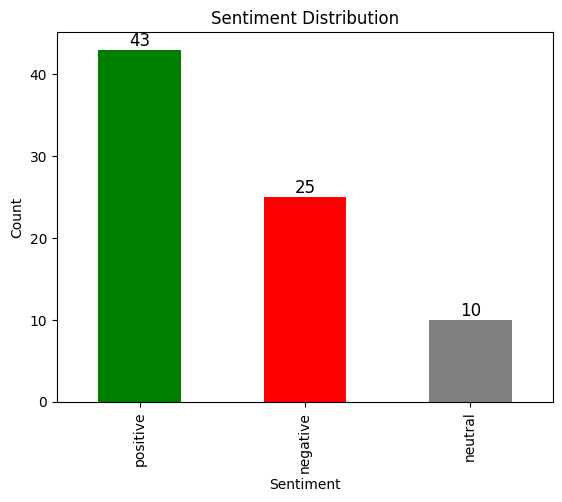

In [26]:
# Visualize sentiment distribution
ax = df['sentiment'].value_counts().plot(kind = 'bar', color = ['green','red','gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

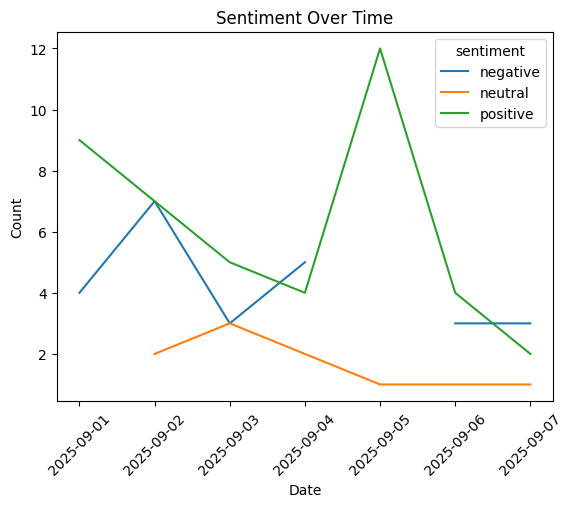

In [30]:
# Time-based analysis
df['created_at'] = pd.to_datetime(df['created_at'])
ax = df.groupby(df['created_at'].dt.date)['sentiment'].value_counts().unstack().plot(kind = 'line')
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Word Cloud

In [51]:
# Remove stopwords
stopwords = set(STOPWORDS)
stopwords.update(["amp", "https", "&amp", "&amp;", "-", "don’t"])  # common in tweets

# show what stopwords are to be excluded in wordcloud          
print("Stopwords used in wordcloud:")
print(sorted(stopwords))

Stopwords used in wordcloud:
['&amp', '&amp;', '-', 'a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'amp', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'don’t', 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'https', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over'

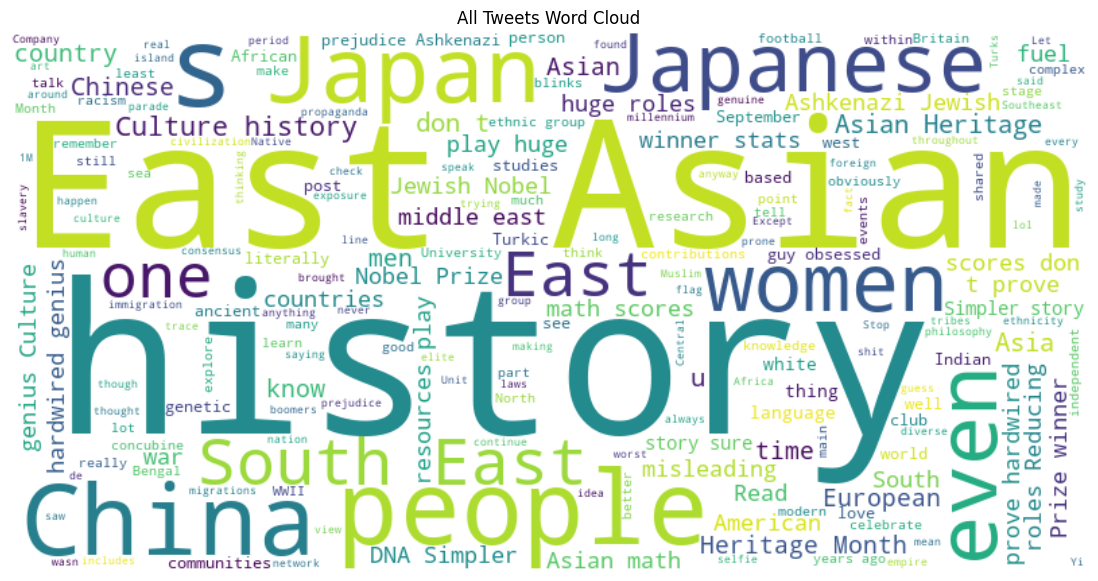

In [52]:
# Combine all tweets into a single string
all_text = " ".join(df['clean_text'].tolist())
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'])
neutral_text  = " ".join(df[df['sentiment'] == 'neutral']['clean_text'])

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis', stopwords = stopwords).generate(all_text)

# Display the word cloud
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title(f"All Tweets Word Cloud")
plt.show()

In [53]:
# Show word frequencies ranked from highest to lowest (by count)
words = [w for w in all_text.lower().split() if w not in stopwords]
word_counts = Counter(words)

print("Top words in all tweets (by count):")
for word, count in word_counts.most_common(30):
    print(f"{word}: {count}")

Top words in all tweets (by count):
east: 85
asian: 79
history: 54
south: 16
history.: 14
people: 12
history,: 11
culture,: 11
even: 10
japan: 10
heritage: 8
huge: 8
japanese: 8
china: 7
story,: 7
middle: 7
one: 7
time: 6
read: 6
asian,: 6
know: 6
ashkenazi: 6
jewish: 6
nobel: 6
prize: 6
winner: 6
stats: 6
math: 6
scores: 6
prove: 6


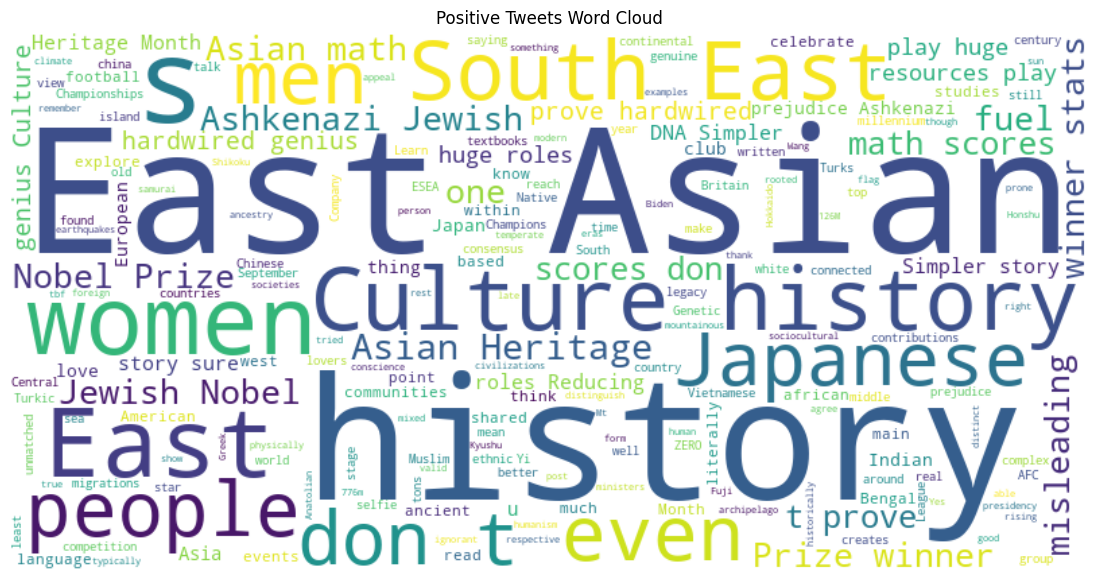

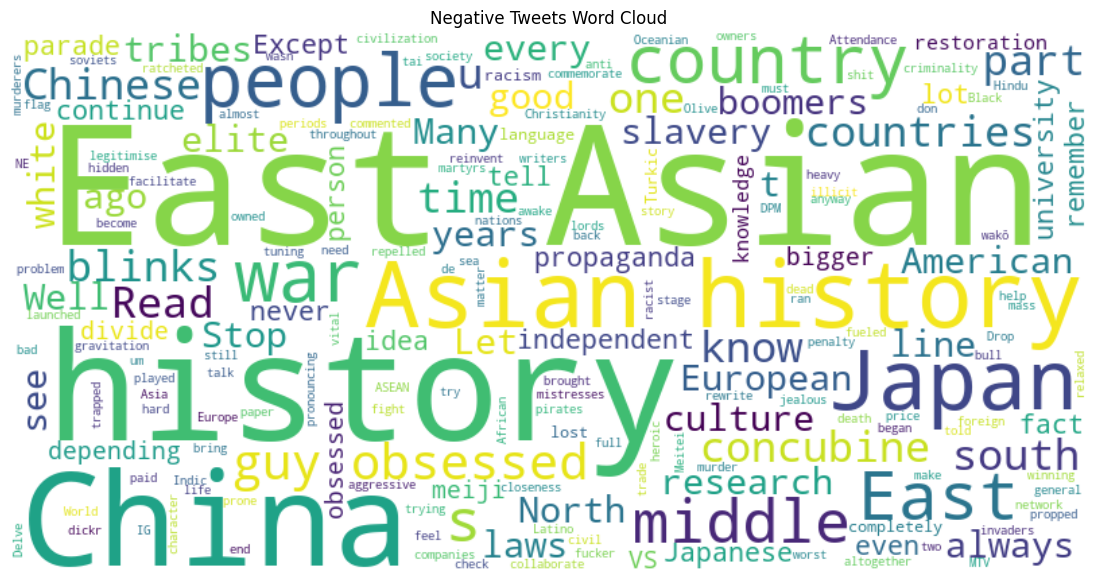

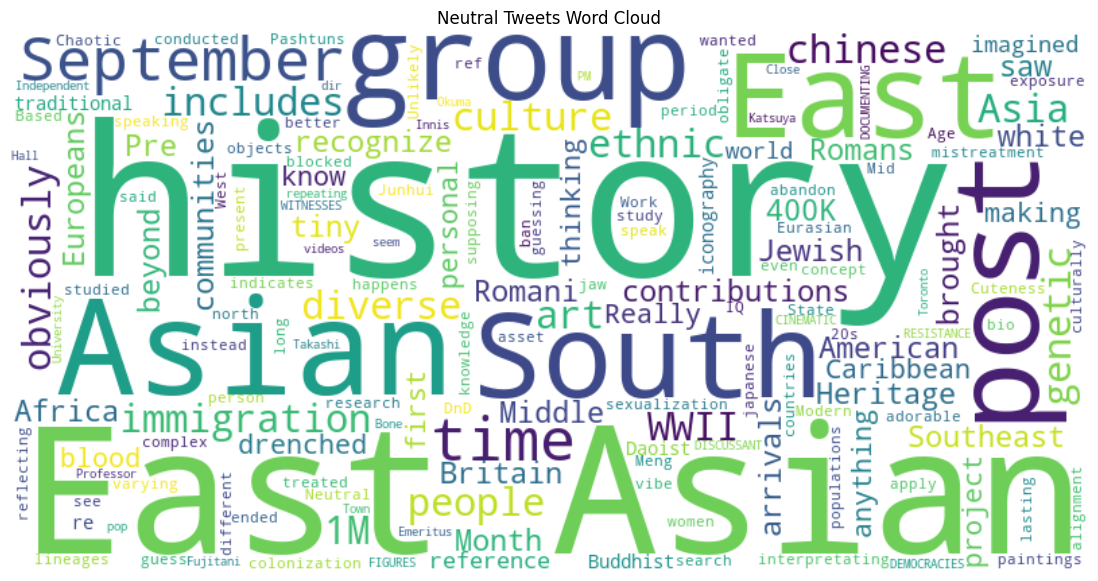

In [54]:
# Word Clouds by Sentiment
for sentiment, text in [('positive', positive_text), ('negative', negative_text), ('neutral', neutral_text)]:
    wc = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis', stopwords = stopwords).generate(text)
    plt.figure(figsize = (15, 7))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(f"{sentiment.capitalize()} Tweets Word Cloud")
    plt.show()

In [55]:
# Show word frequencies ranked from highest to lowest (by count) for each sentiment
for sentiment, text in [('positive', positive_text), ('negative', negative_text), ('neutral', neutral_text)]:
    words = [w for w in text.lower().split() if w not in stopwords]
    word_counts = Counter(words)
    print(f"\n{'='*40}\nTop words in {sentiment.capitalize()} Tweets (by count):\n{'='*40}")
    for word, count in word_counts.most_common(20):
        print(f"{word}: {count}")


Top words in Positive Tweets (by count):
east: 51
asian: 44
history: 29
culture,: 11
south: 10
huge: 8
even: 7
history,: 7
heritage: 7
history.: 6
ashkenazi: 6
jewish: 6
nobel: 6
prize: 6
winner: 6
stats: 6
math: 6
scores: 6
prove: 6
“hardwired: 6

Top words in Negative Tweets (by count):
asian: 25
east: 24
history: 17
history.: 7
japan: 6
obsessed: 6
people: 5
china: 5
war: 5
middle: 4
country: 4
china.: 4
guy: 4
read: 3
time: 3
blinks: 3
south: 3
every: 2
always: 2
research: 2

Top words in Neutral Tweets (by count):
east: 10
asian: 10
history: 8
south: 3
september: 2
time: 2
history,: 2
immigration: 2
includes: 2
diverse: 2
people: 2
asian,: 2
1m: 2
genetic: 2
ethnic: 2
chinese: 2
southeast: 1
heritage: 1
month—a: 1
recognize: 1


### Summary: 
This project analyzed recent tweets related to East Asian history, providing insights into public sentiment and discourse on this topic. 

**Key Findings**
- Sentiment Distribution: The majority of tweets were classified as neutral, with a significant portion being positive and a smaller share negative. This suggests that discussions on East Asian history are often informative or factual, with occasional expressions of strong opinions.
- Trending Topics: Word cloud visualizations revealed that certain keywords and phrases frequently appear in tweets, highlighting popular topics, events, or figures discussed within the community.
- Temporal Trends: Sentiment analysis over time showed fluctuations that may correspond to current events, anniversaries, or news cycles, indicating that public sentiment can shift in response to real-world developments.
- Word Frequency Patterns: Analysis of word frequencies by sentiment category identified distinct vocabularies used in positive, negative, and neutral tweets, offering deeper understanding of how language reflects sentiment.

**Contributions**
- Methodological Template: The project provides a reproducible workflow for collecting, cleaning, analyzing, and visualizing Twitter data, which can be adapted for other topics or languages in digital humanities research.
- Resource for Researchers: The findings and code serve as a resource for scholars interested in social media analysis, public opinion, and the digital study of history.
- Public Discourse Monitoring: By tracking sentiment and trending topics, the project supports ongoing monitoring of how historical subjects are discussed online, which can inform educators, and institutions.
- Open Science: The use of open-source tools and sharing of data and code promote transparency and collaboration in digital humanities.